#6. Qiuz
> sample_NoNA.csv를 읽어 들여 데이터 클랜징을 진행하세요

##1.1 데이터 살펴보기

In [1]:
import pandas as pd
import numpy as np
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
df_ori = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Lec4_BigData/1. 데이터분석을 위한 기초 통계학/1.데이터 클렌징/data/sample_NoNA.csv', encoding='utf-8')
df = df_ori
df.head()

,class,cty,hwy
0,compact,18.0,29.0
1,compact,21.0,29.0
2,compact,NaN,31.0
3,compact,21.0,30.0
4,compact,16.0,26.0


In [ ]:
df.shape

(234, 3)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   class   219 non-null    object 
 1   cty     226 non-null    float64
 2   hwy     229 non-null    float64
dtypes: float64(2), object(1)
memory usage: 5.6+ KB


In [ ]:
df.describe()

,cty,hwy
count,226.000000,229.000000
mean,29.588496,115.135371
std,112.855084,932.040957
min,-50.000000,12.000000
25%,14.000000,18.000000
50%,17.000000,25.000000
75%,19.000000,28.000000
max,999.000000,9999.000000


> 현재 정보로 도심 연비와 고속 연비의 개수가 다른것을 봐서, 결측치가 존재하는 것을 알 수 있다. 평균 ㅇㄴ비를 보면 도심연비는 29이고, 고속연비는 115로 이상치가 존재하는 것을 알 수 있다.
도심연비의 최소값이 음수로 나타나고 최대값이 100을 넘는 수치, 그리고 사분위수에 비해 많은 ㅊ이가 나는 것을 봐서 이상치가 존재함을 알 수 있다.

##1.2 cty 결측치 채우기

In [ ]:
df[df['cty'].isna()]

,class,cty,hwy
2,compact,NaN,31.0
20,suv,NaN,20.0
58,suv,NaN,17.0
93,subcompact,NaN,24.0
100,subcompact,NaN,32.0
137,suv,NaN,17.0
192,compact,NaN,27.0
199,suv,NaN,18.0


In [ ]:
df.groupby('class').describe()

cty                               ...   hwy                     
           count       mean         std   min  ...   25%   50%    75%     max
class                                          ...                           
2seater      5.0  15.400000    0.547723  15.0  ...  24.0  25.0  26.00    26.0
compact     43.0  20.000000    2.803060  15.0  ...  26.0  29.0  29.00  9999.0
midsize     38.0  70.315789  221.839132  15.0  ...  26.0  27.0  29.00    32.0
minivan     11.0  15.818182    1.834022  11.0  ...  22.0  23.0  24.00    24.0
pickup      31.0  13.193548    1.939405   9.0  ...  16.0  17.0  18.75   999.0
subcompact  33.0  49.939394  170.434910  14.0  ...  24.5  26.0  30.50    44.0
suv         50.0  12.320000    9.360010 -50.0  ...  17.0  18.0  19.00    99.0

[7 rows x 16 columns]

>차종(class)를 볼때, 이상치를 뺀 중앙값이 평균과 비슷한것을 볼 수 있다. 
또한, 25% 75%와 비교해도 큰 차이가 나지 않는다. 따라서 cty, hwy 모두 중앙값으로 치환하도록 하겠다.

> 함수화하여 cty, hwy 둘다 사용할 수 있도록 해보겠다.

In [ ]:
 #nan값이 있는 행의 인덱스, median값이 있는 딕셔너리, 바꿀 열의 이름
def replace_median(index_list, median_dict, replace_col):
  for i in index_list:
    #df = df.replace({df[replace_col].iloc[i] : np.nan},{df[replace_col].iloc[i] : median_dict[df.iloc[i]['class']]})   # replace이용 => 실패
    df[replace_col].iloc[i] = median_dict[df.iloc[i]['class']]  # 직접 넣기 => 성공

#def replace_median(median_dict, replace_col):    #fillna 이용해보기 => 카피워닝으로 인한건지 실패...
 # class_list = df[df['cty'].isna()]['class'].values
  #for i in set(class_list):
   # df[df['class'] == i]['cty'] = df[df['class'] == i]['cty'].fillna(median_dict[i])
    #print(df[df['class'] == i]['cty'])

> cty 채워주기

In [ ]:
replace_median(df[df['cty'].isna()].index, df.groupby('class').describe()['cty']['50%'].to_dict(), 'cty')

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
#확인
df[df['cty'].isna()]

,class,cty,hwy


> hwy도 채워준다.

In [ ]:
replace_median(df[df['hwy'].isna()].index, df.groupby('class').describe()['hwy']['50%'].to_dict(), 'hwy')

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
#확인
df[df['hwy'].isna()]

,class,cty,hwy


##1.3 이상치 제거하기

In [ ]:
df.describe()

,cty,hwy
count,234.000000,234.000000
mean,29.132479,113.235043
std,110.928986,922.076612
min,-50.000000,12.000000
25%,14.000000,18.000000
50%,17.000000,25.000000
75%,19.000000,28.000000
max,999.000000,9999.000000


In [ ]:
df[df['hwy']> 100]

,class,cty,hwy
89,pickup,13.0,999.0
172,compact,20.0,9999.0
208,compact,19.0,9999.0


In [ ]:
df.groupby('class').describe()

cty                               ...   hwy                    
           count       mean         std   min  ...   25%   50%   75%     max
class                                          ...                          
2seater      5.0  15.400000    0.547723  15.0  ...  24.0  25.0  26.0    26.0
compact     45.0  20.000000    2.738613  15.0  ...  26.0  29.0  29.0  9999.0
midsize     38.0  70.315789  221.839132  15.0  ...  26.0  27.0  29.0    32.0
minivan     11.0  15.818182    1.834022  11.0  ...  22.0  23.0  24.0    24.0
pickup      31.0  13.193548    1.939405   9.0  ...  16.0  17.0  18.5   999.0
subcompact  35.0  48.171429  165.506617  14.0  ...  24.5  26.0  30.5    44.0
suv         54.0  12.370370    9.001669 -50.0  ...  17.0  18.0  19.0    99.0

[7 rows x 16 columns]

> cty와 hwy 이상치가 있는 행의 다른 값이 50%에 근접한다.
따라서 중앙값으로 이상치를 치환한다.

In [ ]:
def OvertoMedian():
  

SyntaxError: ignored

#2. 강사님 코드

In [ ]:
df2 = df_ori
df2.head(20)

,class,cty,hwy
0,compact,18.0,29.0
1,compact,21.0,29.0
2,compact,20.0,31.0
3,compact,21.0,30.0
4,compact,16.0,26.0
5,compact,18.0,26.0
6,compact,18.0,29.0
7,compact,18.0,26.0
8,compact,16.0,25.0
9,compact,20.0,28.0


> head를 통해 20번째 행까지의 데이터를 확인해 보니 class에 결측치가 나타난 것을 확인했다.

In [ ]:
df2.iloc[10:20]

,class,cty,hwy
10,compact,19.0,27.0
11,NaN,15.0,25.0
12,compact,17.0,25.0
13,compact,17.0,25.0
14,compact,15.0,25.0
15,midsize,15.0,24.0
16,midsize,17.0,25.0
17,midsize,16.0,23.0
18,NaN,14.0,20.0
19,suv,11.0,15.0


> 위의 결과로 10번과 20번이 compact이고, 중간이 결측치임으로 compact임을 예측할 수 있다. 하지만 17번이 midsize이고, 19번이 suv인 18번은 무엇인지 예측할 수 없다. 따라서 예측 가능한 것은 변경하고 나머지는 제거 할 것이다.

In [ ]:
df2.isnull().sum()

class    15
cty       0
hwy       0
dtype: int64

> 클래스는 15, cty는 8, hwy는 5개의 결측치가 존재한다.

##변경된 파일 읽어오기

In [139]:
import pandas as pd
df_ori = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Lec4_BigData/1. 데이터분석을 위한 기초 통계학/1.데이터 클렌징/data/sample_NoNA_modify.csv', encoding='utf-8')
df = df_ori
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   class   229 non-null    object 
 1   cty     226 non-null    float64
 2   hwy     229 non-null    float64
dtypes: float64(2), object(1)
memory usage: 5.6+ KB


###2.1 차종 결측치 제거
> 현재 나타난 class의 결측치는 예측할 수 없음으로 제거한다.

In [ ]:
#class가 결측치인 데이터 추출
df[df['class'].isnull()]

#class가 유효한 데이터 추출
df_class = df[df['class'].notnull()]
df_class.isnull().sum()
#df['class'].dropna(axis=0)

class    0
cty      8
hwy      5
dtype: int64

> notnull함수를 이용하여 유효한 데이터만 추출하고 결과를 확인해 보면 class의 결측치가 제거된 것을 볼 수 잇다.

##3. 이상치 처리

###3.1 이상치 확인

In [ ]:
df_class.describe()

,cty,hwy
count,221.000000,224.000000
mean,29.972851,117.299107
std,114.100670,942.317620
min,-50.000000,12.000000
25%,14.000000,18.000000
50%,17.000000,25.000000
75%,19.000000,28.000000
max,999.000000,9999.000000


> 최소값에 음수가 나타나거나 최대값이 100을 넘은 수가 나타남으로, 이상치가 존재함을 알 수 있다.

{'boxes': [<matplotlib.lines.Line2D at 0x7f2ca16090d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f2ca1617110>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f2ca7e3c750>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f2ca1617bd0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f2ca19248d0>,
  <matplotlib.lines.Line2D at 0x7f2ca1609b90>]}

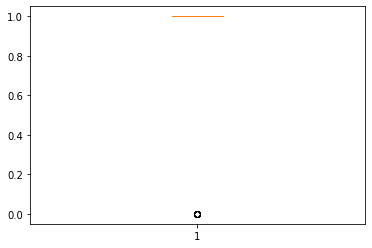

In [ ]:
import matplotlib.pyplot as plt
plt.boxplot(df_class['cty'].notnull())

> 이상치 확인을 위해 boxplot을 실행했지만 아무런 결과도 나오지 않는다. 이는 결측치가 포함되어 있어 나타나는 문제일 수 있다.

In [ ]:
cty_series = df_class['cty']
cty_series[cty_series.notnull()]

0       18.0
1       21.0
3       21.0
4       16.0
5       18.0
       ...  
229     19.0
230    999.0
231     16.0
232     18.0
233     17.0
Name: cty, Length: 221, dtype: float64

이상치 확인을 위해 cty정보만 추출하였고 이 중 유효 데이터만 추출하기 위해 notnull함수를 적용했다.

{'boxes': [<matplotlib.lines.Line2D at 0x7f2ca10e47d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f2ca10e9890>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f2ca10f08d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f2ca10f0390>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f2ca10e4dd0>,
  <matplotlib.lines.Line2D at 0x7f2ca10e9350>]}

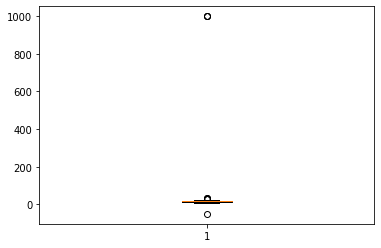

In [ ]:
plt.boxplot(cty_series[cty_series.notnull()])

> boxplot 실행결과 음수와 큰 범위의 양수가 결측치로 나타나는 것을 확인할 수 있다.

In [ ]:
cty_series[cty_series.notnull()].describe()
#describe()로도 이상치를 확인할 수 있다.


count    221.000000
mean      29.972851
std      114.100670
min      -50.000000
25%       14.000000
50%       17.000000
75%       19.000000
max      999.000000
Name: cty, dtype: float64

###3.2 한계치를 이용한 이상치 확인

In [ ]:
cty_series_notnull = cty_series[cty_series.notnull()]
q1, q3 = np.percentile(cty_series_notnull, [25, 75])
IQR = q3-q1

cty_lowerfence = q1-IQR*1.5
#cty_upperfence = q3 + IQR*1.5
#cty_upperfence = q3 + IQR*3
cty_upperfence =  35
df_class[df_class['cty']<cty_lowerfence]

,class,cty,hwy
63,suv,-50.0,15.0


> 최저 한계치보다 작은 값으로 하나의 음수결과가 나타난 것을 볼 수 있다.

In [ ]:
df_class[df_class['cty']>cty_upperfence]

,class,cty,hwy
106,subcompact,999.0,36.0
156,midsize,999.0,27.0
230,midsize,999.0,29.0


> 위 결과에서 정상으로 보이는 이상값들이 있다. -> upperfence를 상향조정해야한다. 
(35까지 정상이라 가정하여 35를 초과하는 값을 이상치로 판단한다.)

In [ ]:
 df_class[df_class['cty']>cty_upperfence]

,class,cty,hwy
106,subcompact,999.0,36.0
156,midsize,999.0,27.0
230,midsize,999.0,29.0


In [ ]:
df_class[df_class['class']=='suv']
df_class[df_class['hwy']==15]

df_class[(df_class['class']=='suv') & (df_class['hwy']==15)]

,class,cty,hwy
19,suv,11.0,15.0
30,suv,11.0,15.0
63,suv,-50.0,15.0
130,suv,11.0,15.0
133,suv,11.0,15.0
198,suv,11.0,15.0


> 위의 결과 처럼 class가 suv이고 hwy가 15인 데이터를 얻기 위해 & 연산을 이용했다. 두 논리에 대한 연산이므로 &(and) 연산을 한 것이다.

> 위의 결과에서 이상치를 처리하기 위해 사용해야 할 것은 중앙값이다. 평균값은 이상치가 적용되어 사용할 수 없다.

In [ ]:
df_class_suv_15 = df_class[(df_class['class']=='suv') & (df_class['hwy'] == 15)]
df_class_suv_15.describe()

,cty,hwy
count,6.000000,6.0
mean,0.833333,15.0
std,24.903146,0.0
min,-50.000000,15.0
25%,11.000000,15.0
50%,11.000000,15.0
75%,11.000000,15.0
max,11.000000,15.0


> 위의 결과처럼 평균은 0보다 작은 소수가 나와 말도 안되는 연비가 나타나게 된다. 따라서 중앙값을 이용하여 대표값을 선정해야 한다.

##3.3 이상치 함수 만들기

In [ ]:
  className = 'suv'
mpg='20'
df1= pd.DataFrame()
df1=df1.append({
      'class':className,
      'cty':999,
      'hwy':mpg
  }, ignore_index=True)
df1=df1.append({
      'class':className,
      'cty':999,
      'hwy':mpg
  }, ignore_index=True)
df1=df1.append({
      'class':className,
      'cty':11,
      'hwy':mpg
  }, ignore_index=True)
df1=df1.append({
      'class':className,
      'cty':-50,
      'hwy':mpg
  }, ignore_index=True)
df1

,class,cty,hwy
0,suv,999.0,20
1,suv,999.0,20
2,suv,11.0,20
3,suv,-50.0,20


In [ ]:
df1.replace({'cty' : 999}, {'cty': 11})


,class,cty,hwy
0,suv,11.0,20
1,suv,11.0,20
2,suv,11.0,20
3,suv,11.0,20


In [ ]:
target = 'cty'
lower = 0
upper = 100

boolupper = df1[target]>upper
boollower = df1[target]<lower

df1[boolupper | boollower][target]

Series([], Name: cty, dtype: float64)

> 0보다 작은 값과 100보다 큰 값은 동시에 일어날 수 없는 것이고, 두 경우 다 포함하여 제거해야하기 때문에 |(or)연산을 처리하였다.

> 위 정보가 들어있는 값을 대표값으로 변경해야 한다. 하지만 위처럼 중복된 값이 나타나 의미없이 여러번 반복될 수 있음으로, 중복제이터를 제거해 보자

In [ ]:
print(df1[boolupper | boollower])
df1_drop_duplicates = df1[boolupper | boollower].drop_duplicates(target)
df1_drop_duplicates

Empty DataFrame
Columns: [class, cty, hwy]
Index: []


,class,cty,hwy


In [ ]:
min = 11

for val in df1_drop_duplicates[target].values:
  df1 = df1.replace({target : val}, {target : min})

In [ ]:
df1

,class,cty,hwy
0,suv,11.0,20
1,suv,11.0,20
2,suv,11.0,20
3,suv,11.0,20


In [ ]:
df1_drop_duplicates[target].values

array([], dtype=float64)

In [ ]:
df

,class,cty,hwy
0,compact,18.0,29.0
1,compact,21.0,29.0
2,compact,NaN,31.0
3,compact,21.0,30.0
4,compact,16.0,26.0
...,...,...,...
229,midsize,19.0,28.0
230,midsize,999.0,29.0
231,midsize,16.0,26.0
232,midsize,18.0,26.0


> 1. class와 hwy가 같은 차종의 cty 중간값 구하기
2. 이상치 중복 제거
3. 이상치 치환

###3.1.1 class와 hwy과 같은 차종의 cty 중간값 구하기

In [ ]:

className='compact'
mpg = 31

bool_target = ((df['class']==className) & (df['hwy']==mpg))
df[bool_target]

,class,cty,hwy
2,compact,NaN,31.0
188,compact,21.0,31.0
189,compact,22.0,31.0


> 차종과 고속연비가 같은 데이터 추출

In [ ]:
df_sample = df[bool_target]
median = np.median(df_sample['cty'])
median

nan

In [ ]:
def ConvertAbnormality(data_frame, className, mpg):
  bool_target = ((data_frame['class']==className) & (data_frame['hwy']==mpg))
  df_sample = data_frame[bool_target]
  median = np.median(df_sample['cty'])
  print(median)

In [ ]:
ConvertAbnormality(df, 'suv', 15)

11.0


In [ ]:
df.groupby('class').describe()


cty                               ...   hwy                     
           count       mean         std   min  ...   25%   50%    75%     max
class                                          ...                           
2seater      5.0  15.400000    0.547723  15.0  ...  24.0  25.0  26.00    26.0
compact     45.0  20.177778    3.446269  15.0  ...  26.0  29.0  29.25  9999.0
midsize     41.0  66.560976  213.787400  15.0  ...  26.0  27.0  29.00    32.0
minivan     11.0  15.818182    1.834022  11.0  ...  22.0  23.0  24.00    24.0
pickup      33.0  13.000000    2.046338   9.0  ...  16.0  17.0  18.25   999.0
subcompact  33.0  49.939394  170.434910  14.0  ...  24.5  26.0  30.50    44.0
suv         53.0  12.433962    9.098836 -50.0  ...  17.0  18.0  19.00    99.0

[7 rows x 16 columns]

####3.1.2 이상치 중복 제거

In [ ]:
lower = 0
upper = 100

bool_upper = df_sample['cty']>upper
bool_lower = df_sample['cty']<lower

df_sample[bool_lower | bool_upper].drop_duplicates('cty')

,class,cty,hwy


> lower와 upper를 이용하여 기준값을 설정하고 기준값을 벗어난 값중 'cty'를 기준으로 중복값을 제거한다.

In [ ]:
def ConvertAbnormality(data_frame, className, mpg, lower, upper):
  bool_target = ((data_frame['class']==className) & (data_frame['hwy']==mpg))
  df_sample = data_frame[bool_target]
  median = np.median(df_sample['cty'])

  bool_upper = df_sample['cty']>upper
  bool_lower = df_sample['cty']<lower

  df_drop = df_sample[bool_lower | bool_upper].drop_duplicates('cty')
  print(df_drop)

ConvertAbnormality(df, 'suv', 15, 0, 100)

   class   cty   hwy
63   suv -50.0  15.0


####3.1.3 이상치 치환

In [ ]:
bool_target = ((df['class']==className) & (df['hwy']==mpg))
df_sample = df[bool_target]

> 전체 dataframe에서 조건이 맞는 데이터만 변경을 할 예정이기 때문에 df[bool_target]을 이용하는 것이다.

In [ ]:
df_drop = df_sample[bool_lower | bool_upper].drop_duplicates('cty')
for val in df_drop['cty']:
  df[bool_target] = df[bool_target].replace({'cty': val}, {'cty' : median})

print(df[bool_target])
print(df.tail())

       class   cty   hwy
2    compact   NaN  31.0
188  compact  21.0  31.0
189  compact  22.0  31.0
       class    cty   hwy
229  midsize   19.0  28.0
230  midsize  999.0  29.0
231  midsize   16.0  26.0
232  midsize   18.0  26.0
233  midsize   17.0  26.0


> 이상치가 발생된 도심연비의 값을 중간값으로 변경한다. ㄷ조건에 맞는 데이터만 변경했음으로 df[bool_tartget]으로 출력하면 변경된 내용을 확인할 수 있지만 그 이외의 데이터는 변경되지 않았음으로 df.tail()을 실행하면 변경되지 않은 부분이 나타나는 것을 볼 수 있다.

> df.tail은 마지막 데이터만 보여주는 것으로, 인자가 없으면 5개를 기본정보로 출력하며 수치를 입력하면 입력한 데이터 만큼 출력된다.

In [ ]:
def ConvertAbnormality(data_frame, className, mpg, lower, upper):
  bool_target = ((data_frame['class']==className) & (data_frame['hwy']==mpg))
  df_sample = data_frame[bool_target]
  median = np.median(df_sample['cty'])

  bool_upper = df_sample['cty']>upper
  bool_lower = df_sample['cty']<lower

  df_drop = df_sample[bool_lower | bool_upper].drop_duplicates('cty')
  for val in df_drop['cty']:
    data_frame[bool_target] = data_frame[bool_target].replace({'cty': val}, {'cty' : median})
  return data_frame[bool_target]
ConvertAbnormality(df, 'midsize', 29.0, 0, 100)

,class,cty,hwy
35,midsize,18.0,29.0
179,midsize,21.0,29.0
227,midsize,21.0,29.0
228,midsize,18.0,29.0
230,midsize,21.0,29.0


> df.tail에서 230, midsize, 99, 29에서 함수를 적용하여 midsize, 21, 29로 중앙값을 적용하였다.

In [ ]:
df.tail()

,class,cty,hwy
229,midsize,19.0,28.0
230,midsize,21.0,29.0
231,midsize,16.0,26.0
232,midsize,18.0,26.0
233,midsize,17.0,26.0


##3.4 이상치 제거 목록 만들기

In [ ]:
lowerfence = 0
upperfence = 100

df_lower = df_class[df_class['cty']<lowerfence]
df_upper = df_class[df_class['cty']>upperfence]

print(df_lower)
print(df_upper)

   class   cty   hwy
63   suv -50.0  15.0
          class    cty   hwy
106  subcompact  999.0  36.0
156     midsize  999.0  27.0
230     midsize  999.0  29.0


> 위의 결과는 최저한계치와 최대 한계치를 벗어난 이상치를 추출한 내용이다.


In [ ]:
df_abnomality = df_class[(df_class['cty']<lowerfence) | (df_class['cty']>upperfence)]
df_abnomality

,class,cty,hwy
63,suv,-50.0,15.0
106,subcompact,999.0,36.0
156,midsize,999.0,27.0
230,midsize,999.0,29.0


In [ ]:
df_abnomality = pd.concat([df_lower, df_upper])
df_abnomality

,class,cty,hwy
63,suv,-50.0,15.0
106,subcompact,999.0,36.0
156,midsize,999.0,27.0
230,midsize,999.0,29.0


> concat함수는 두 dataframe 을 합치는 기능을 한다.

In [ ]:
for idx, row in df_abnomality.iterrows():
  print(idx)
  print(row)
  print("================================")


63
class    suv
cty      -50
hwy       15
Name: 63, dtype: object
106
class    subcompact
cty             999
hwy              36
Name: 106, dtype: object
156
class    midsize
cty          999
hwy           27
Name: 156, dtype: object
230
class    midsize
cty          999
hwy           29
Name: 230, dtype: object


> iterrows()함수는 index와 row정보를 전달한다. index는 위의 그림에서 idx를 의미하며, row는 각 행을 의미한다.

In [ ]:
for idx, row in df_abnomality.iterrows():
  class_name = row['class']
  mpg = row['hwy']
  df_class = ConvertAbnormality(df, class_name, mpg, 0, 100)
  print(ConvertAbnormality(df, class_name, mpg, 0, 100))

    class   cty   hwy
19    suv  11.0  15.0
30    suv  11.0  15.0
63    suv  11.0  15.0
130   suv  11.0  15.0
133   suv  11.0  15.0
198   suv  11.0  15.0
          class     cty   hwy
105  subcompact   25.00  36.0
106  subcompact  146.75  36.0
       class   cty   hwy
32   midsize  19.0  27.0
109  midsize  18.0  27.0
145  midsize  19.0  27.0
156  midsize  19.0  27.0
180  midsize  21.0  27.0
       class   cty   hwy
35   midsize  18.0  29.0
179  midsize  21.0  29.0
227  midsize  21.0  29.0
228  midsize  18.0  29.0
230  midsize  21.0  29.0


In [ ]:
bool_class = df_class['class']==class_name
bool_hwy = df_class['hwy']==mpg
print(df_class[(bool_class)&(bool_hwy)])

       class   cty   hwy
35   midsize  18.0  29.0
179  midsize  21.0  29.0
227  midsize  21.0  29.0
228  midsize  18.0  29.0
230  midsize  21.0  29.0


In [ ]:
df_class.describe()

,cty,hwy
count,5.000000,5.0
mean,19.800000,29.0
std,1.643168,0.0
min,18.000000,29.0
25%,18.000000,29.0
50%,21.000000,29.0
75%,21.000000,29.0
max,21.000000,29.0


##3.5 버그 수정

In [ ]:
df_class = df_ori[df_ori['class'].notnull()]
print(df_class.isnull().sum())
print(df_class.describe())

class    0
cty      8
hwy      5
dtype: int64
              cty          hwy
count  221.000000   224.000000
mean    17.532805   117.299107
std      9.707618   942.317620
min      9.000000    12.000000
25%     14.000000    18.000000
50%     17.000000    25.000000
75%     19.000000    28.000000
max    146.750000  9999.000000


> 이전 코드에서 수치가 변경되었기 때문에 원본 데이터를 다시 읽어들이고 결과를 확인한다.

* df_class.isnull().sum(): class가 0인지 확인
* df_class.describe() : cty의 max가 999인지 확인

In [ ]:
def getMedian(data_frame):
  series_describe = data_frame.describe()
  if series_describe['count']<=2:
    return series_describe['min']
  return series_describe['50%']



def ConvertAbnormality(data_frame, className, mpg, lower, upper):
  bool_target = ((data_frame['class']==className) & (data_frame['hwy']==mpg))
  df_sample = data_frame[bool_target]
  
  #데이터가 2개인 경우 중간값이 아닌 최소값 전달
  #median = np.median(df_sample['cty'])
  median = getMedian(df_sample['cty'])
  bool_upper = df_sample['cty']>upper
  bool_lower = df_sample['cty']<lower

  df_drop = df_sample[bool_lower | bool_upper].drop_duplicates('cty')
  for val in df_drop['cty']:
    data_frame[bool_target] = data_frame[bool_target].replace({'cty': val}, {'cty' : median})
  return data_frame[bool_target]

#ConvertAbnormality(df_class, 'suv', 15, 0, 100)
ConvertAbnormality(df_class, 'subcompact', 36, 0, 100)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1715: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, v)


,class,cty,hwy
105,subcompact,25.0,36.0
106,subcompact,25.0,36.0


> ckwhddl subcompact이고, 고속연비가 36인 차는 2대만 존재하여, 중간값이 대표값으로 사용할 수 없게 된다.

> 위의 코드에서 print(series_describe['count']) 확인결과 2라는 값을 얻었으므로 상황에 따른 중간값 또는 최소값을 반환할 수 있다.

In [ ]:
for idx, row in df_abnomality.iterrows():
  class_name = row['class']
  mpg = row['hwy']
  df_class = ConvertAbnormality(df, class_name, mpg, 0, 100)
  print(ConvertAbnormality(df, class_name, mpg, 0, 100))

    class   cty   hwy
19    suv  11.0  15.0
30    suv  11.0  15.0
63    suv  11.0  15.0
130   suv  11.0  15.0
133   suv  11.0  15.0
198   suv  11.0  15.0
          class   cty   hwy
105  subcompact  25.0  36.0
106  subcompact  25.0  36.0
       class   cty   hwy
32   midsize  19.0  27.0
109  midsize  18.0  27.0
145  midsize  19.0  27.0
156  midsize  19.0  27.0
180  midsize  21.0  27.0
       class   cty   hwy
35   midsize  18.0  29.0
179  midsize  21.0  29.0
227  midsize  21.0  29.0
228  midsize  18.0  29.0
230  midsize  21.0  29.0


# 함수화 시킨 코드를 cty, hwy 두 속성에서 작동되게 만들기

In [ ]:
df = df_ori

In [ ]:
df.describe()

,cty,hwy
count,226.000000,229.000000
mean,29.588496,115.135371
std,112.855084,932.040957
min,-50.000000,12.000000
25%,14.000000,18.000000
50%,17.000000,25.000000
75%,19.000000,28.000000
max,999.000000,9999.000000


In [ ]:
#lowfence, upperfence구하기 함수화
def getFences(data_frame, col):
  q1 = data_frame[col].describe()['25%']
  q3 = data_frame[col].describe()['75%']
  IQR = q3 - q1

  return [q1 - IQR*1.5, q3 + IQR*3]


#이상치가 있는 행을 모아 하나의 데이터프레임으로 반환
def getAbnormality(data_frame, col, lowerfence, upperfence):
  df_lower = data_frame[data_frame[col]<lowerfence]
  df_upper = data_frame[data_frame[col]>upperfence]

  return pd.concat([df_lower, df_upper])


#중앙값을 반환하거나, 행 데이터의 개수가 2개밖에 안될때에는 최소값으로 반환
def getMedian(data_frame):
  series_describe = data_frame.describe()
  if series_describe['count']<=2:
    return series_describe['min']
  return series_describe['50%']



#이상치 중앙값으로 치환 함수화
def ConvertAbnormality(data_frame, className, mpg, lower, upper, col_abnormal, col_side):
  bool_target = ((data_frame['class']==className) & (data_frame[col_side]==mpg))
  df_sample = data_frame[bool_target]
  
  #데이터가 2개인 경우 중간값이 아닌 최소값 전달
  #median = np.median(df_sample['cty'])
  median = getMedian(df_sample[col_abnormal])
  bool_upper = df_sample[col_abnormal]>upper
  bool_lower = df_sample[col_abnormal]<lower

  df_drop = df_sample[bool_lower | bool_upper].drop_duplicates(col_abnormal)
  for val in df_drop[col_abnormal]:
    data_frame[bool_target] = data_frame[bool_target].replace({col_abnormal: val}, {col_abnormal : median})
  return data_frame

In [ ]:
df_abnomality

,class,cty,hwy
89,pickup,13.0,999.0
125,suv,14.0,99.0
172,compact,20.0,9999.0
208,compact,19.0,9999.0


In [ ]:
for column in df.columns[1:]:
  if column == 'cty':
    side_col = 'hwy'
  elif column == 'hwy':
    side_col = 'cty'

  lowerfence, upperfence = getFences(df, column)

  df_abnomality = getAbnormality(df, column, lowerfence, upperfence)

  for idx, row in df_abnomality.iterrows():
    class_name = row['class']
    mpg = row[side_col]
    df = ConvertAbnormality(df, class_name, mpg, lowerfence, upperfence, column, side_col)
    print("column: ",column)
    print("idx: ",idx)
    print("row: ",row)

column:  cty
idx:  63
row:  class    suv
cty      -50
hwy       15
Name: 63, dtype: object
column:  cty
idx:  106
row:  class    subcompact
cty             999
hwy              36
Name: 106, dtype: object
column:  cty
idx:  156
row:  class    midsize
cty          999
hwy           27
Name: 156, dtype: object
column:  cty
idx:  221
row:  class    subcompact
cty              35
hwy              44
Name: 221, dtype: object
column:  cty
idx:  230
row:  class    midsize
cty          999
hwy           29
Name: 230, dtype: object
column:  hwy
idx:  89
row:  class    pickup
cty          13
hwy         999
Name: 89, dtype: object
column:  hwy
idx:  125
row:  class    suv
cty       14
hwy       99
Name: 125, dtype: object
column:  hwy
idx:  172
row:  class    compact
cty           20
hwy         9999
Name: 172, dtype: object
column:  hwy
idx:  208
row:  class    compact
cty           19
hwy         9999
Name: 208, dtype: object


In [ ]:
df['hwy'].describe()

count    229.000000
mean      23.408297
std        5.993079
min       12.000000
25%       18.000000
50%       24.000000
75%       27.000000
max       44.000000
Name: hwy, dtype: float64

In [ ]:
df['cty'].describe()

count    226.000000
mean      16.884956
std        4.284862
min        9.000000
25%       14.000000
50%       17.000000
75%       19.000000
max       35.000000
Name: cty, dtype: float64

##3.6 고속연비 확인
> 고속연비 관련 boxplot 만들어보세요


In [ ]:
df['hwy'].describe()

count     229.000000
mean      115.135371
std       932.040957
min        12.000000
25%        18.000000
50%        25.000000
75%        28.000000
max      9999.000000
Name: hwy, dtype: float64

In [ ]:
hwy_series = df_class['hwy']
type(hwy_series)
hwy_series.isnull().sum()

#유효데이터 추출
hwy_series.notnull()
hwy_series_valid = hwy_series[hwy_series.notnull()]

{'boxes': [<matplotlib.lines.Line2D at 0x7f2c9badd790>],
 'caps': [<matplotlib.lines.Line2D at 0x7f2c9bae2850>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f2c9bae8890>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f2c9bae8350>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f2c9baddd90>,
  <matplotlib.lines.Line2D at 0x7f2c9bae2310>]}

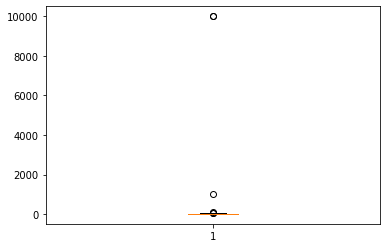

In [ ]:
plt.boxplot(hwy_series_valid)

{'boxes': [<matplotlib.lines.Line2D at 0x7f2c9bb65110>],
 'caps': [<matplotlib.lines.Line2D at 0x7f2c9bb6e1d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f2c9bb73210>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f2c9bb6ec90>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f2c9bb65710>,
  <matplotlib.lines.Line2D at 0x7f2c9bb65c50>]}

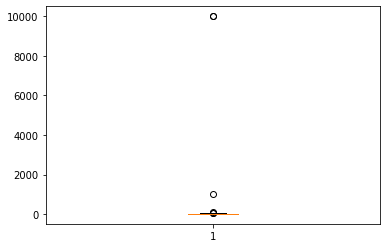

In [ ]:
plt.boxplot(df[df['hwy'].notnull()]['hwy'])

In [ ]:
df.groupby('class').describe()

cty                               ...   hwy                     
           count       mean         std   min  ...   25%   50%    75%     max
class                                          ...                           
2seater      5.0  15.400000    0.547723  15.0  ...  24.0  25.0  26.00    26.0
compact     45.0  20.177778    3.446269  15.0  ...  26.0  29.0  29.25  9999.0
midsize     41.0  66.560976  213.787400  15.0  ...  26.0  27.0  29.00    32.0
minivan     11.0  15.818182    1.834022  11.0  ...  22.0  23.0  24.00    24.0
pickup      33.0  13.000000    2.046338   9.0  ...  16.0  17.0  18.25   999.0
subcompact  33.0  49.939394  170.434910  14.0  ...  24.5  26.0  30.50    44.0
suv         53.0  12.433962    9.098836 -50.0  ...  17.0  18.0  19.00    99.0

[7 rows x 16 columns]

In [6]:
df_notnull = df[df.notnull()]

In [7]:
df_notnull['hwy'].describe()

count     229.000000
mean      115.135371
std       932.040957
min        12.000000
25%        18.000000
50%        25.000000
75%        28.000000
max      9999.000000
Name: hwy, dtype: float64

> 사분위수 만들기

In [8]:
#방법1
q1 = df_notnull['hwy'].describe()['25%']
q3 = df_notnull['hwy'].describe()['75%']
IQR = q3 - q1

#방법2
#q1, q3 = np.percentile(df_notnull['hwy'], [25, 75])
lowerfence = q1 - IQR*1.5
upperfence = q3 + IQR*2

print("q1", q1, "q3", q3, "IQR", IQR, "low", lowerfence, "upper", upperfence)

q1 18.0 q3 28.0 IQR 10.0 low 3.0 upper 48.0


> 이상치 목록 만들기

In [9]:
df_abnormal = df_notnull[(df_notnull['hwy']<lowerfence) | (df_notnull['hwy'] > upperfence)]
df_abnormal

,class,cty,hwy
89,pickup,13.0,999.0
125,suv,14.0,99.0
172,compact,20.0,9999.0
208,compact,19.0,9999.0


In [ ]:
def getfences(data_frame, class_name):
  q1 = df.groupby('class').describe().loc['pickup']['hwy']['25%']
  q3 = df.groupby('class').describe().loc['pickup']['hwy']['75%']
  IQR = q3 - q1

  lower = q1-IQR*1.5
  upper = q3+IQR*2
  return [lower, upper]

In [ ]:
# 클래스와 cty로 hwy를 바꾼다.
df_class = df[(df['class']=='pickup') & (df['cty']==13.0)]

lower, upper = getfences(df, 'pickup')

df_list = df_class[(df_class['hwy'] < lower) | (df_class['hwy'] > upper)]
median = df_class.describe()['hwy']['50%']
for val in df_list['hwy'].values:
  df[(df['class']=='pickup') & (df['cty']==13.0)] = df[(df['class']=='pickup') & (df['cty']==13.0)].replace({'hwy':val}, {'hwy' : median})

In [ ]:
df_class['hwy']

50    17.0
66    17.0
67    17.0
72    17.0
85    16.0
86    16.0
87    17.0
89    17.0
Name: hwy, dtype: float64

In [ ]:
df_list['hwy']

Series([], Name: hwy, dtype: float64)

In [ ]:
df[df['class'] == 'pickup'].describe()

,cty,hwy
count,33.000000,32.000000
mean,13.000000,16.718750
std,2.046338,2.113465
min,9.000000,12.000000
25%,11.000000,16.000000
50%,13.000000,17.000000
75%,14.000000,18.000000
max,17.000000,20.000000


In [27]:
def getfences(data_frame, class_name):
  q1 = df.groupby('class').describe().loc[class_name]['hwy']['25%']
  q3 = df.groupby('class').describe().loc[class_name]['hwy']['75%']
  IQR = q3 - q1

  lower = q1-IQR*1.5
  upper = q3+IQR*3
  return lower, upper

def cleanAbnormal_hwy(data_frame, class_name, cty_val):
  df_class = data_frame[(data_frame['class']==class_name) & (data_frame['cty']==cty_val)]

  lower, upper = getfences(data_frame, class_name)
  median = df_class.describe()['hwy']['50%']

  df_list = df_class[(df_class['hwy'] < lower) | (df_class['hwy'] > upper)]

  for val in df_list['hwy'].values:
    print(val)
    data_frame[(data_frame['class']==class_name) & (data_frame['cty']==cty_val)] = data_frame[(data_frame['class']==class_name) & (data_frame['cty']==cty_val)].replace({'hwy':val}, {'hwy' : median})

  return data_frame

In [28]:
df_abnormal
#89, 125, 172, 208

,class,cty,hwy
89,pickup,13.0,999.0
125,suv,14.0,99.0
172,compact,20.0,9999.0
208,compact,19.0,9999.0


In [34]:
for idx, row in df_abnormal.iterrows():
  class_name = row['class']
  cty_val = row['cty']
  print("class_name:", class_name,", cty_val: ", cty_val)
  df = cleanAbnormal_hwy(df, class_name, cty_val)
  print("바뀐것 확인: ",df.iloc[idx])
  print()

class_name: pickup , cty_val:  13.0
999.0
바뀐것 확인:  class    pickup
cty          13
hwy          17
Name: 89, dtype: object

class_name: suv , cty_val:  14.0
99.0
바뀐것 확인:  class    suv
cty       14
hwy       17
Name: 125, dtype: object

class_name: compact , cty_val:  20.0
9999.0
바뀐것 확인:  class    compact
cty           20
hwy         27.5
Name: 172, dtype: object

class_name: compact , cty_val:  19.0
9999.0
바뀐것 확인:  class    compact
cty           19
hwy           27
Name: 208, dtype: object



In [31]:
inx_list= [89, 125, 172, 208]
for idx in inx_list:
  print(df.iloc[idx])
  print()

class    pickup
cty          13
hwy          17
Name: 89, dtype: object

class    suv
cty       14
hwy       17
Name: 125, dtype: object

class    compact
cty           20
hwy         27.5
Name: 172, dtype: object

class    compact
cty           19
hwy           27
Name: 208, dtype: object



In [ ]:
df

,class,cty,hwy
0,compact,18.0,29.0
1,compact,21.0,29.0
2,compact,NaN,31.0
3,compact,21.0,30.0
4,compact,16.0,26.0
...,...,...,...
229,midsize,19.0,28.0
230,midsize,999.0,29.0
231,midsize,16.0,26.0
232,midsize,18.0,26.0


#4. 결측치 처리

In [35]:
df.isna().sum()

class    5
cty      8
hwy      5
dtype: int64

> 위의 결과와 같이 도심 연비8, 고속연비 5개의 격측치가 나타난 것을 볼 수 있따.

> 도심 연비 결측치를 출력해 보세요

In [36]:
df[df['cty'].isna()]

,class,cty,hwy
2,compact,NaN,31.0
20,suv,NaN,20.0
58,suv,NaN,17.0
93,subcompact,NaN,24.0
100,subcompact,NaN,32.0
137,suv,NaN,17.0
192,compact,NaN,27.0
199,suv,NaN,18.0


In [103]:
classes = df[df['cty'].isna()]['class'].values
classes

array(['compact', 'suv', 'suv', 'subcompact', 'subcompact', 'suv',
       'compact', 'suv'], dtype=object)

In [104]:
hwys = df[df['cty'].isna()]['hwy'].values
hwys

array([31., 20., 17., 24., 32., 17., 27., 18.])

In [80]:
for idx in range(len(classes)):
  print(df[(df['class'] == classes[idx]) & (df['hwy'] == hwys[idx])])
  print()

       class   cty   hwy
2    compact   NaN  31.0
188  compact  21.0  31.0
189  compact  22.0  31.0

    class   cty   hwy
20    suv   NaN  20.0
124   suv  15.0  20.0
152   suv  14.0  20.0
174   suv  16.0  20.0
177   suv  16.0  20.0

    class   cty   hwy
21    suv  13.0  17.0
31    suv  14.0  17.0
57    suv  13.0  17.0
58    suv   NaN  17.0
60    suv  13.0  17.0
77    suv  14.0  17.0
79    suv  14.0  17.0
82    suv  13.0  17.0
134   suv  11.0  17.0
137   suv   NaN  17.0
140   suv  13.0  17.0
150   suv  14.0  17.0
151   suv  15.0  17.0
176   suv  15.0  17.0
178   suv  14.0  17.0

          class   cty   hwy
93   subcompact   NaN  24.0
119  subcompact  17.0  24.0
120  subcompact  16.0  24.0
121  subcompact  17.0  24.0

          class   cty   hwy
100  subcompact   NaN  32.0
101  subcompact  25.0  32.0
103  subcompact  24.0  32.0

    class   cty   hwy
21    suv  13.0  17.0
31    suv  14.0  17.0
57    suv  13.0  17.0
58    suv   NaN  17.0
60    suv  13.0  17.0
77    suv  14.0  17.0
79   

> 이상치가 처리된 상태이고 결측치는 평균연산에 적용되지 않기 때문에 대표값을 평균으로 사용할 수 있다.

In [70]:
for idx in range(len(classes)):
  print(df[(df['class'] == classes[idx]) & (df['hwy'] == hwys[idx])])

> 위와같이 도심 연비에 대한 평균을 구할 수 있다.

> 차종이 compact이고 고속연비가 31인 차 중 결측치를 평균으로 치환하시오

In [196]:
col_list = df.columns[1:]

for col in col_list:
  if col == 'cty': std_col = 'hwy'
  elif col == 'hwy': std_col = 'cty'

  classes = df[df[col].isna()]['class'].values
  hwys = df[df[col].isna()][std_col].values

  for idx in range(len(classes)):
    class_mean = df[(df['class'] == classes[idx]) & (df[std_col] == hwys[idx])][col].mean()

    if np.isnan(class_mean): #pickup 17.0일때 nan값이 유지된다.
      print(class_mean, classes[idx], hwys[idx])
      df = df.drop(index=df[(df['class'] == classes[idx]) & (df['cty'] == hwys[idx])].index)
    #방법1 작동확인 => O
    df[(df['class'] == classes[idx]) & (df[std_col] == hwys[idx])] = df[(df['class'] == classes[idx]) & (df[std_col] == hwys[idx])].fillna(class_mean)

    #방법2 => X, np.nan으로 찾아지지 않는다.
    #df[(df['class'] == classes[idx]) & (df['hwy'] == hwys[idx])] = df[(df['class'] == classes[idx]) & (df['hwy'] == hwys[idx])].replace({classes[idx]:np.nan},{classes[idx]:hwys[idx]})

nan pickup 17.0


In [199]:
classes = df[df['hwy'].isna()]['class'].values
hwys = df[df['hwy'].isna()]['cty'].values
for idx in range(len(classes)):
  print(classes[idx])
  print(hwys[idx])
  print(df[(df['class'] == classes[idx]) & (df['cty'] == hwys[idx])])
  print()

In [198]:
df.isna().sum()

class    5
cty      0
hwy      0
dtype: int64

In [200]:
df.iloc[202]

class    pickup
cty          15
hwy          17
Name: 203, dtype: object

#강사님 코드2

In [205]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Lec4_BigData/1. 데이터분석을 위한 기초 통계학/1.데이터 클렌징/data/sample_NoNA_modify.csv', encoding='utf-8')

In [178]:
df_drop = df[df['hwy'].isna()].drop_duplicates()
df_drop

,class,cty,hwy
6,compact,18.0,NaN
158,midsize,16.0,NaN
193,compact,24.0,NaN
202,pickup,17.0,NaN
211,compact,17.0,NaN


In [174]:
for idx, row in df_drop.iterrows():
  class_name = row.values[0]
  mpg = row.values[2]

  bool_class = df['class'] == class_name
  bool_hwy = df['hwy'] == mpg
  cty_mean = df[bool_class & bool_hwy]['cty'].mean()
  print(df[bool_class & bool_hwy])
  df[bool_class & bool_hwy] = df[bool_class & bool_hwy].replace({'hwy':np.nan},{'hwy':cty_mean})

       class   cty   hwy
2    compact   NaN  31.0
188  compact  21.0  31.0
189  compact  22.0  31.0
    class   cty   hwy
20    suv   NaN  20.0
124   suv  15.0  20.0
152   suv  14.0  20.0
174   suv  16.0  20.0
177   suv  16.0  20.0
    class   cty   hwy
21    suv  13.0  17.0
31    suv  14.0  17.0
57    suv  13.0  17.0
58    suv   NaN  17.0
60    suv  13.0  17.0
77    suv  14.0  17.0
79    suv  14.0  17.0
82    suv  13.0  17.0
134   suv  11.0  17.0
137   suv   NaN  17.0
140   suv  13.0  17.0
150   suv  14.0  17.0
151   suv  15.0  17.0
176   suv  15.0  17.0
178   suv  14.0  17.0
          class   cty   hwy
93   subcompact   NaN  24.0
119  subcompact  17.0  24.0
120  subcompact  16.0  24.0
121  subcompact  17.0  24.0
          class   cty   hwy
100  subcompact   NaN  32.0
101  subcompact  25.0  32.0
103  subcompact  24.0  32.0
       class   cty   hwy
10   compact  19.0  27.0
142  compact  19.0  27.0
170  compact  20.0  27.0
186  compact  21.0  27.0
192  compact   NaN  27.0
    class   ct

In [175]:
df.isna().sum()

class    5
cty      8
hwy      5
dtype: int64

> 고속 연비의 결측치를 처리하세요

In [171]:
#결측치 목록 만들기
df[df['hwy'] == np.nan]

,class,cty,hwy


> 실행결과 hwy의 결측치 1개가 변경되지 않은 것을 볼 수 있다.

In [170]:
df[df['hwy'].isna()]

,class,cty,hwy
6,compact,18.0,NaN
158,midsize,16.0,NaN
193,compact,24.0,NaN
202,pickup,17.0,NaN
211,compact,17.0,NaN


> 평균 정보가 결측치만 존재하는 경우 nan만 나타나게 된다.

In [208]:
def getNaNList(data_frame, cty_hwy):
  df_class_NaN = data_frame[cty_hwy].isnull()
  print(data_frame[df_class_NaN])
  return data_frame[df_class_NaN].drop_duplicates()

def getMean(data_frame, class_name, mpg, src, dest):
  bool_class = data_frame['class'] == class_name
  bool_mpg = data_frame[src] ==mpg
  return data_frame[bool_class & bool_mpg][dest].mean()
  